In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = "/content/student_lifestyle_dataset.csv"

df = pd.read_csv(data)
df.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [3]:
features = df.drop(['Student_ID', 'Stress_Level'], axis = 1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print("Data ready")

Data ready


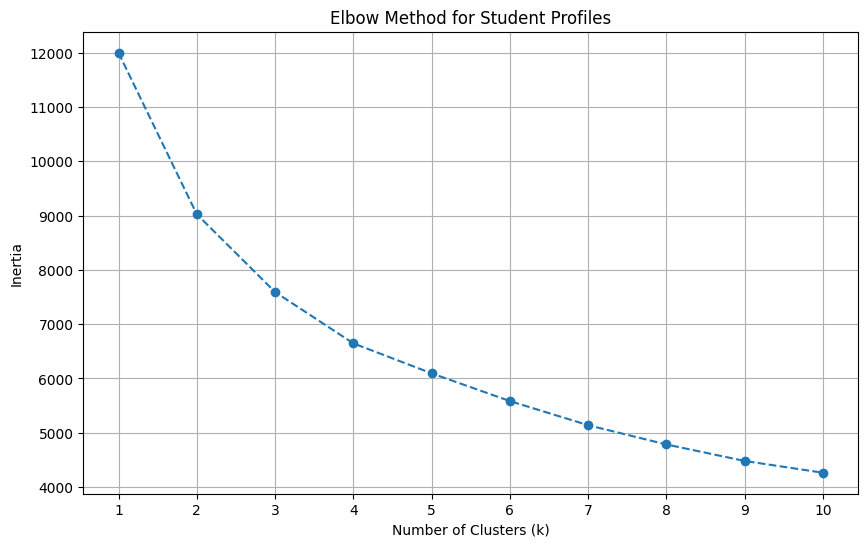

In [4]:
inertia = []
K_range = range(1, 11)

for k in K_range:
  kmeans = KMeans(n_clusters = k, random_state=42, n_init=10)
  kmeans.fit(scaled_features)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(K_range, inertia, marker= 'o', linestyle= '--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Student Profiles')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [6]:
OPTIMAL_CLUSTER_NUMBER = 3

kmeans = KMeans(n_clusters=OPTIMAL_CLUSTER_NUMBER, random_state=42, n_init=10)
df['Profile_Number'] = kmeans.fit_predict(scaled_features)

print(f"Created {OPTIMAL_CLUSTER_NUMBER} Student Profiles")
print("\nFirst 10 students for each profiles: ")
print(df[['Student_ID', 'Stress_Level', 'Profile_Number']].head(10))

Created 3 Student Profiles

First 10 students for each profiles: 
   Student_ID Stress_Level  Profile_Number
0           1     Moderate               2
1           2          Low               2
2           3          Low               2
3           4     Moderate               0
4           5         High               0
5           6     Moderate               0
6           7         High               2
7           8         High               1
8           9          Low               2
9          10     Moderate               2


--- Connection between Student Profiles ---
                Study_Hours_Per_Day  Sleep_Hours_Per_Day  ...   GPA  Stress_Number
Profile_Number                                            ...                     
0                              6.57                  6.7  ...  2.98           1.31
1                              8.89                  7.8  ...  3.38           2.00
2                              6.59                  7.9  ...  2.92           0.79

[3 rows x 6 columns]


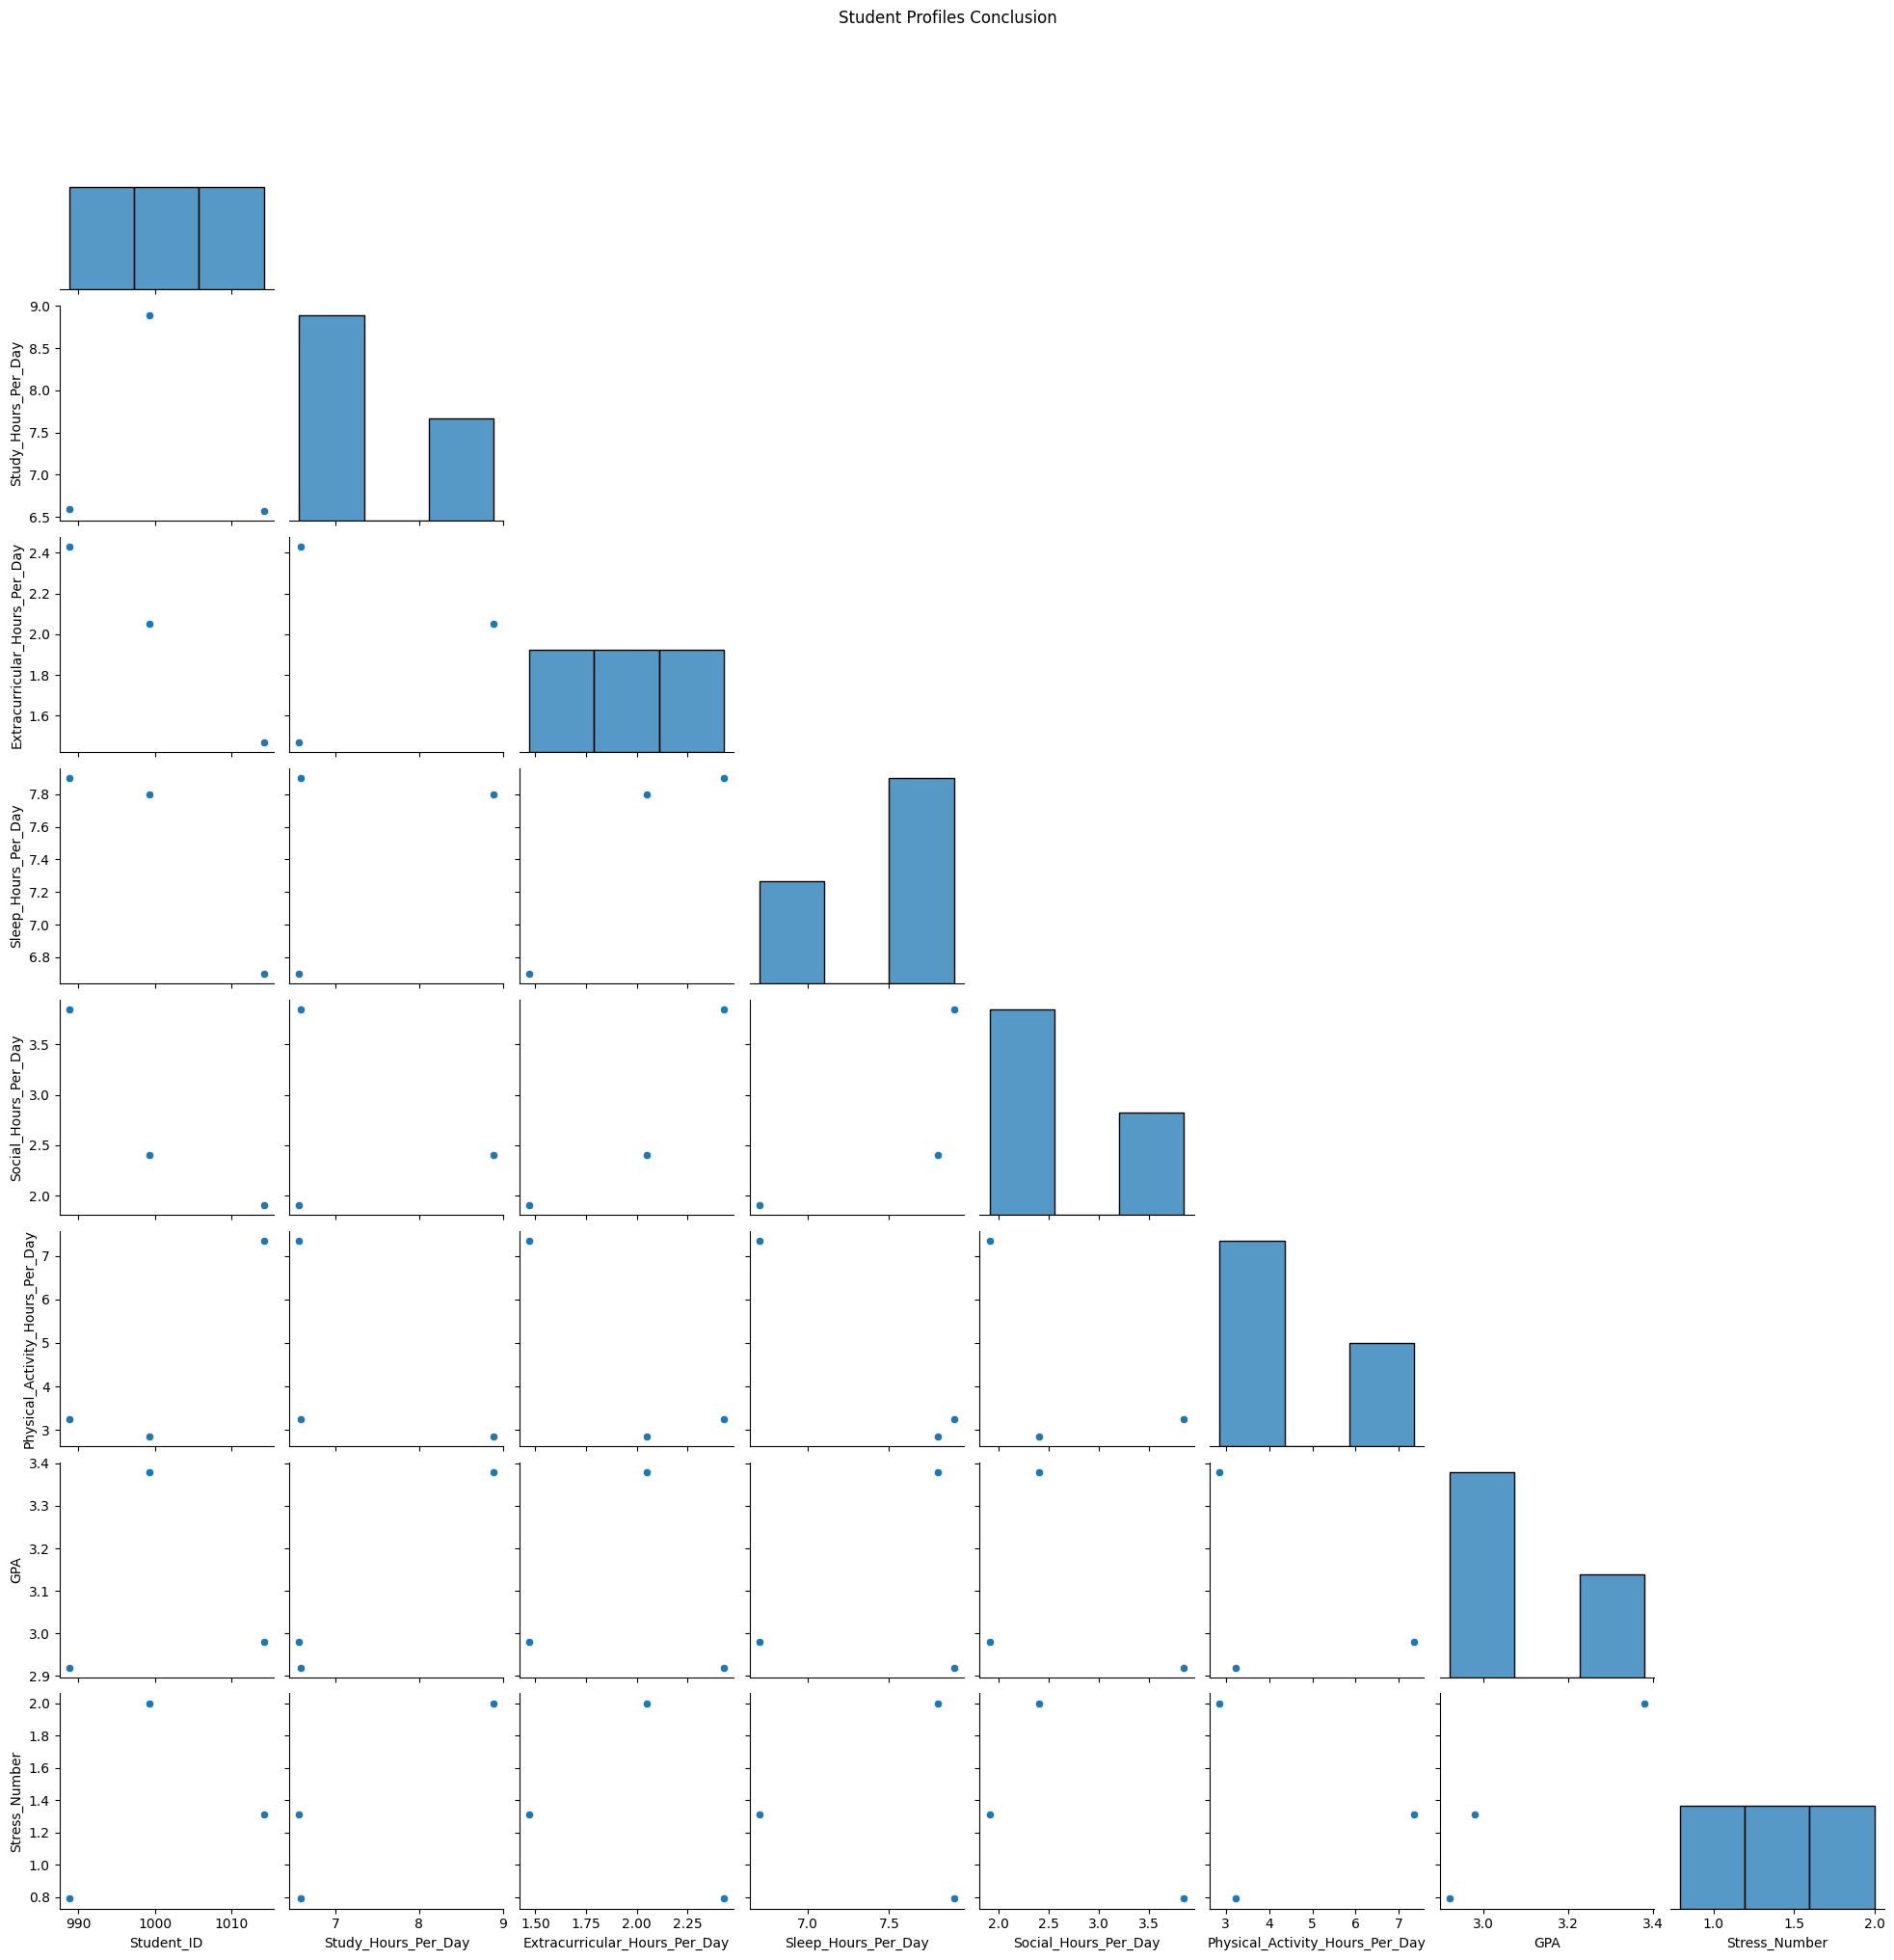

In [7]:
stress_mapping= {'Low': 0, 'Medium': 1, 'High': 2}
df['Stress_Number'] = df['Stress_Level'].map(stress_mapping)

analyse_profile = df.groupby('Profile_Number').mean(numeric_only=True).round(2)

print("--- Connection between Student Profiles ---")
print(analyse_profile[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Number']])

sns.pairplot(analyse_profile, corner=True)
plt.suptitle("Student Profiles Conclusion", y=1.02)
plt.show()


In [8]:
analyse_profile[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA', 'Stress_Number']]

,Study_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Number
Profile_Number,,,,,,
0,6.57,6.7,1.91,7.35,2.98,1.31
1,8.89,7.8,2.40,2.86,3.38,2.00
2,6.59,7.9,3.85,3.24,2.92,0.79
